Problem Statement: The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [ ]:
# Importing reqd libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
df=pd.read_csv("gas_turbines.csv")

EDA

In [ ]:
df.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468


In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

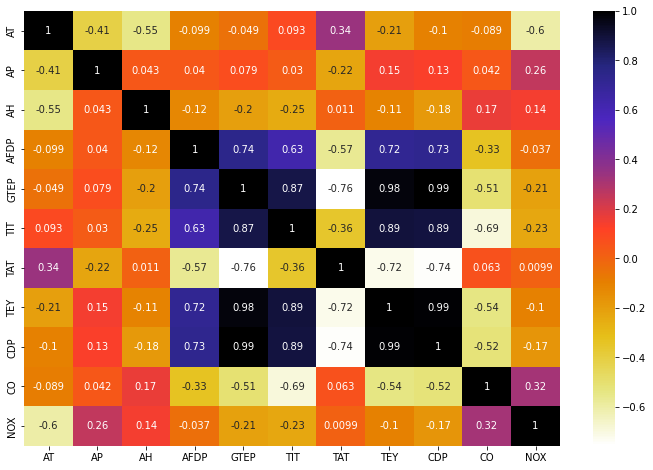

In [ ]:
# Ploting correlation heatmap
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

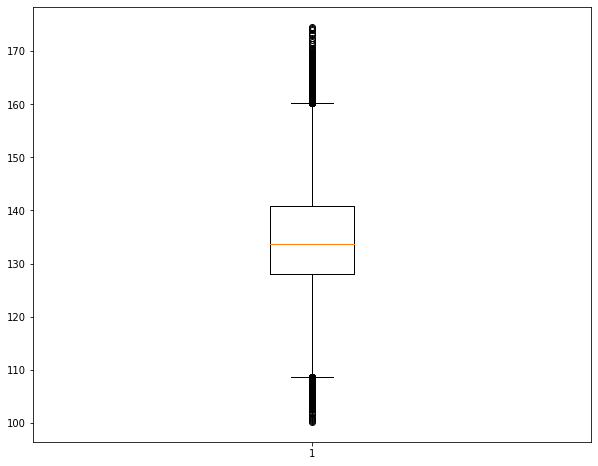

In [ ]:
# Plotting the variables to see the distribution
plt.figure(figsize=(10,8))
plt.boxplot(df.TEY)
plt.show()

<AxesSubplot:>

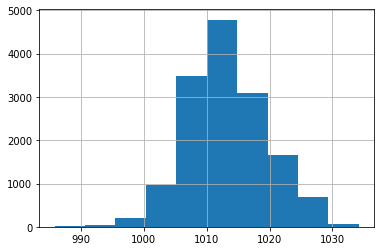

In [ ]:
df.AP.hist()

<AxesSubplot:>

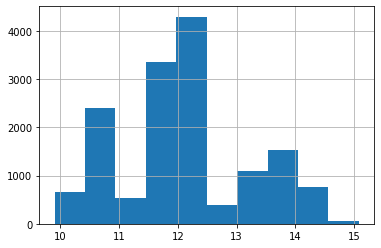

In [ ]:
df.CDP.hist()

<AxesSubplot:xlabel='TEY', ylabel='AP'>

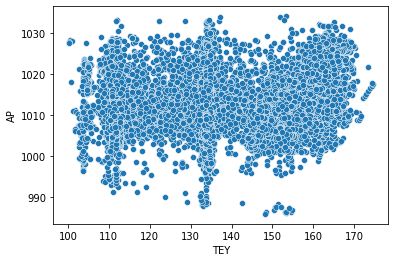

In [ ]:
sns.scatterplot(x='TEY', y='AP',data=df)

In [ ]:
# Dividing data into X and y for further model building
X=df.drop('TEY',axis=1)
y=df['TEY']

In [ ]:
#Standardizing the data 
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_standard,y, test_size=0.3, random_state = 0)

Tuning of Hyperparameters
Batch Size
Epochs

In [ ]:
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(8, input_dim=10, kernel_initializer='uniform', activation='linear'))
    model.add(Dense(4,kernel_initializer='uniform', activation='linear'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100,150]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standard,y)

<ipython-input-39-82b60931e269>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=0.000 total time=  24.5s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.000 total time=  24.5s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.000 total time=  43.2s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.000 total time=  24.8s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.002 total time=  43.3s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00033255736343562603, using {'batch_size': 10, 'epochs': 10}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 10, 'epochs': 10}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 10, 'epochs': 50}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 10, 'epochs': 100}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 10, 'epochs': 150}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 20, 'epochs': 10}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 20, 'epochs': 50}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 20, 'epochs': 100}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 20, 'epochs': 150}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 40, 'epochs': 10}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 40, 'epochs': 50}
0.00033255736343562603,0.0006651147268712521 with: {'batch_size': 40, 'epochs': 100}
0

Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standard,y)

<ipython-input-12-eee58ee54ad4>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  42.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  37.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  42.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  42.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  43.8s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [ ]:
# finding best result
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grids = dict(activation_function = activation_function,init = init)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standard,y)

<ipython-input-12-796451981ba2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  55.9s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  35.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  42.6s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  42.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  36.9s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=  35.5s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=  42.6s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=  43.8s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=  43.0s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=  36.7s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=  35.4s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=  43.0s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=  43.1s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=  43.1s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=  43.1s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=  43.3s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=  43.4s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=  34.0s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=  33.0s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=  37.0s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=  34.2s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=  35.5s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=  34.2s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=  42.9s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=  42.9s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=  42.8s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=  34.3s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=  33.0s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=  42.5s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=  42.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=  32.8s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=  37.3s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=  34.7s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=  44.0s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=  43.1s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=  33.6s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=  42.9s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=  34.7s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=  43.2s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=  42.7s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=  33.2s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=  42.5s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=  44.3s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=  35.8s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=  34.1s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=  35.2s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=  43.0s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=  42.9s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=  42.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.002 total time=  42.8s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=  33.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=  34.4s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=  33.5s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=  42.6s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.002 total time=  44.2s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=  43.0s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=  36.0s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=  34.0s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=  42.9s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=  37.5s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00033255736343562603, using {'activation_function': 'linear', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'zero'}
0.00033255736343562603,0.0006651147268712521 with: {'activation_function': 'linear', 'init': 'uniform'}
0.00033255736343562603,0.0006651147268712521 with: {'activation_function': 'linear', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'zero'}


Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)
neuron1 = [4,8,16]
neuron2 = [2,4,8]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standard,y)

<ipython-input-16-0f0a1b4d4570>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=  43.3s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=  35.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=  42.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=  42.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.002 total time=  44.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=  35.5s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=  33.9s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=  43.1s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=  43.0s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.002 total time=  36.4s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=  34.2s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=  34.7s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=  33.9s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=  42.9s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.002 total time=  42.9s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=  42.7s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=  44.5s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=  35.5s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=  42.9s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.002 total time=  43.0s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=  42.9s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=  34.2s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=  43.8s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=  35.0s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.002 total time=  43.0s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=  35.0s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=  43.2s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=  33.0s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=  37.4s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.002 total time=  42.9s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=  43.0s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=  43.0s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=  43.0s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=  43.0s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.002 total time=  43.0s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=  43.0s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=  35.8s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=  33.6s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=  42.9s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.002 total time=  42.9s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=  37.1s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=  35.4s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=  42.9s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=  35.0s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.002 total time=  33.9s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00033255736343562603, using {'neuron1': 4, 'neuron2': 2}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 4, 'neuron2': 2}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 4, 'neuron2': 4}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 4, 'neuron2': 8}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 8, 'neuron2': 2}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 8, 'neuron2': 4}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 8, 'neuron2': 8}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 16, 'neuron2': 2}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 16, 'neuron2': 4}
0.00033255736343562603,0.0006651147268712521 with: {'neuron1': 16, 'neuron2': 8}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)



<ipython-input-19-ffabe52d0cf1>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)


In [ ]:
# Fitting the model

model.fit(X_standard,y)



In [ ]:
# Predicting using trained model

y_predict = model.predict(X_standard)


470/470 [==============================] - 1s 2ms/step
